In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
dataframe=pd.read_csv("./Train_Test_Windows_10.csv")

In [3]:
dataframe.head(10)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos
5,0,0,0,0.850670758,0,72.30701444,0,100,0,0.077333705,...,0.004767983,0.012070027,0.243401465,284270.6052,7.227312748,42271.56164,0.158932767,0.001670347,1,dos
6,2,0,0,1.718765039,0,57.73488018,0,100,0,0.781256836,...,0.185050279,0.287074862,3.400818757,2605890.835,340.00204,14482.07059,6.168342973,0.00084433,1,dos
7,1,0,0,1.953685004,0,53.21837952,0,100,0,0.547031801,...,0.270206362,0.369339437,3.304436184,2656634.863,353.5049167,12440.55688,9.006878732,0.001044804,1,dos
8,2,0,0,1.642300541,0,51.22413591,0,100,0,1.32948139,...,0.151404359,0.197130981,1.524221071,1319853.812,198.002737,11618.87968,5.046811959,0.000995601,1,dos
9,5,0,0,2.110519704,0,52.76299259,0,100,0,0.859841361,...,0.198902501,0.228856577,0.998468549,910622.4899,111.3600799,11956.78706,6.630083024,0.002055098,1,dos


In [4]:
dataframe.type.value_counts()

normal       10000
ddos          4608
password      3628
xss           1269
injection      612
dos            525
scanning       447
mitm            15
Name: type, dtype: int64

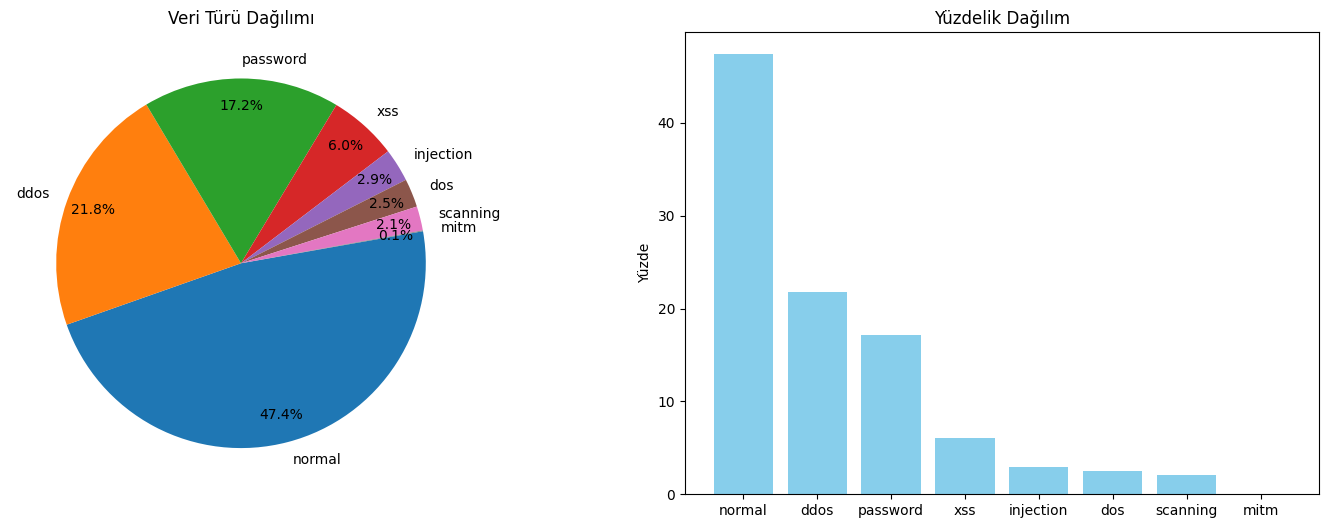

In [5]:
import matplotlib.pyplot as plt

# DataFrame'deki 'type' sütunundaki değerlerin sayısını al
value_counts = dataframe['type'].value_counts()

# Pasta grafiğini oluştur
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Pasta grafiği
ax[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=10, counterclock=False, pctdistance=0.85)
ax[0].set_title('Veri Türü Dağılımı')

# Yüzdelik bar grafiği
ax[1].bar(value_counts.index, value_counts / value_counts.sum() * 100, color='skyblue')
ax[1].set_ylabel('Yüzde')
ax[1].set_title('Yüzdelik Dağılım')

plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder oluştur
label_encoder = LabelEncoder()

# 'type' sütununu sayısallaştır
dataframe['type_encoded'] = label_encoder.fit_transform(dataframe['type'])

# Sınıfların hangi sayısal değere karşılık geldiğini kontrol et
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)
dataframe= dataframe.drop("type", axis=1)

Class Mapping:
{'ddos': 0, 'dos': 1, 'injection': 2, 'mitm': 3, 'normal': 4, 'password': 5, 'scanning': 6, 'xss': 7}


In [7]:
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type_encoded
dtypes: float64(5), int32(1), int64(51), object(69)
memory usage: 20.2+ MB
None


In [8]:
# Tüm sütunları float64'e dönüştür
dataframe = dataframe.apply(pd.to_numeric, errors='coerce', axis=1)

# Sonucu kontrol et
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type_encoded
dtypes: float64(126)
memory usage: 20.3 MB
None


In [9]:
dataframe['type_encoded']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
21099    3.0
21100    3.0
21101    3.0
21102    3.0
21103    3.0
Name: type_encoded, Length: 21104, dtype: float64

In [10]:
# 'label' sütununun diğer sütunlarla korelasyonları
correlations = dataframe.corr()['type_encoded']

# NaN değerlere sahip sütunları filtrele
columns_to_drop = correlations[correlations.isna()].index

# NaN değerlere sahip sütunları DataFrame'den çıkar
dataframe = dataframe.drop(columns=columns_to_drop, axis=1)


dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 107 entries, Processor_DPC_Rate to type_encoded
dtypes: float64(107)
memory usage: 17.2 MB


In [11]:
toplam=0
pozort=0
poztop=0
pozi=0
negtop=0
negort=0
negi=0
# 'label' sütununun diğer sütunlarla korelasyonları
correlations = dataframe.corr()['type_encoded']

# Tüm sütun adlarını ve ilişkili korelasyon değerlerini ekrana yazdır
for column, correlation in correlations.items():
    print(f"{column}: {correlation}")

    if 0.14972162479892778 > correlation > 0:
        pozort=pozort+correlation
        pozi=pozi+1
        poztop=poztop+correlation

    elif correlation < 0 and correlation >= -0.1645839900029373:
        negort=negort+correlation
        negi=negi+1
        negtop=negtop+correlation


    toplam =toplam+correlation

# 'label' sütununun diğer sütunlarla korelasyonları

# Korelasyon değerlerinin ortalamasını hesapla
correlation_mean = correlations.mean()

correlation_std = correlations.std()



# Pozitif ve negatif korelasyon değerlerini içeren sütunları seç
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

positive_correlations = positive_correlations.std()
negative_correlations= negative_correlations.std()

# Ortalamayı ekrana yazdır
print(f"\nİlişkili korelasyon değerlerinin ortalaması: {correlation_mean}")
print(f"toplam ortlama {toplam/106}")
print(f"Negatif degerler ortalaması {negort/negi}")
print(f"Pozitif degerler ortalaması {pozort/pozi}")
print(f"Toplam pozitif sayısı {pozi}")
print(f"Toplam neg sayısı {negi}")
print(f"Pozitif Toplam {poztop}")
print(f"Negatif Toplam {negtop}")
print(f"stardart sapma ortlama degerler için {correlation_std}")
print(f"Pozitif değerler için standart sapma: {positive_correlations}")
print(f"Negatif değerler için standart sapma: {negative_correlations*-1}")


Processor_DPC_Rate: 0.10457835291636677
Processor_pct_ Idle_Time: -0.505162914214371
Processor_pct_ Interrupt_Time: 0.05346007002509498
Processor_pct_ User_Time: 0.5182762743399136
Processor_pct_ C1_Time: -0.505162914214371
Processor_pct_ Processor_Time: 0.5137926660045745
Processor_C1_ransitions_sec: 0.06879295608471551
Processor_pct_ DPC_Time: 0.2817582628507369
Processor_pct_ Privileged_Time: 0.27214013022168154
Processor_DPCs_Queued_sec: 0.1402884980751294
Processor_Interrupts_sec: 0.17796255435346173
Process_Pool_Paged Bytes: -0.2399605347975137
Process_IO Read_Operations_sec: 0.027718466975869823
Process_Working_Set_ Private: -0.011457016275274191
Process_Working_Set_Peak: -0.015512035926579352
Process_IO_Write Operations_sec: 0.08598916875675411
Process_Page_File Bytes: 0.19085701845572658
Process_pct_ User_Time: 0.5205195191093767
Process_Virtual_Bytes Peak: -0.20890567634331692
Process_Page_File Bytes Peak: 0.18459148346352414
Process_IO_Other_Bytes_sec: 0.09943013663243665
Pr

<Axes: >

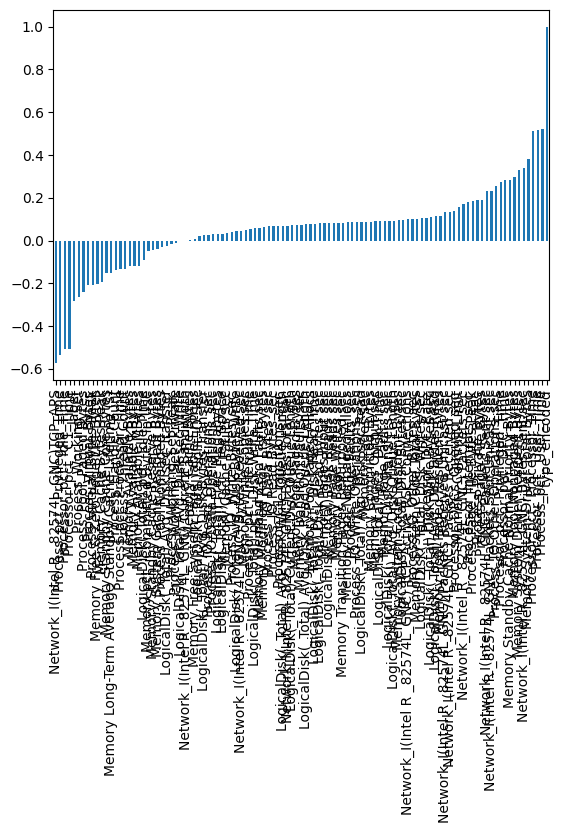

In [12]:
correlations.sort_values().plot(kind="bar")


In [13]:
# 'label' sütununun diğer sütunlarla korelasyonları
columns_add = []
for column, correlation in correlations.items():
    if 0 < correlation < 0.14972162479892778:
        columns_add.append(column)
        print(f"stunadı {column} degeri{correlation}")
    elif -0.1645839900029373 <= correlation < 0:
        columns_add.append(column)
        print(f"stunadı {column} degeri{correlation}")
        


columns_add.append("type_encoded")

# Seçilen sütunları DataFrame'den al
dataframe_selected = dataframe[columns_add]

# Yeni DataFrame'in bilgilerini yazdır
print(dataframe_selected.info())

stunadı Processor_DPC_Rate degeri0.10457835291636677
stunadı Processor_pct_ Interrupt_Time degeri0.05346007002509498
stunadı Processor_C1_ransitions_sec degeri0.06879295608471551
stunadı Processor_DPCs_Queued_sec degeri0.1402884980751294
stunadı Process_IO Read_Operations_sec degeri0.027718466975869823
stunadı Process_Working_Set_ Private degeri-0.011457016275274191
stunadı Process_Working_Set_Peak degeri-0.015512035926579352
stunadı Process_IO_Write Operations_sec degeri0.08598916875675411
stunadı Process_IO_Other_Bytes_sec degeri0.09943013663243665
stunadı Process_IO_Write_Bytes_sec degeri0.03815924244469511
stunadı Process_pct_ Processor_Time degeri-0.1319241535269881
stunadı Process_Pool Nonpaged Bytes degeri-0.029088256109733857
stunadı Process_Page Faults_sec degeri0.08588338938149853
stunadı Process_IO Data Operations_sec degeri0.029832284440997538
stunadı Process_Thread Count degeri-0.13123707968978285
stunadı Process_IO Data Bytes_sec degeri0.06768687854308016
stunadı Process_

<Axes: >

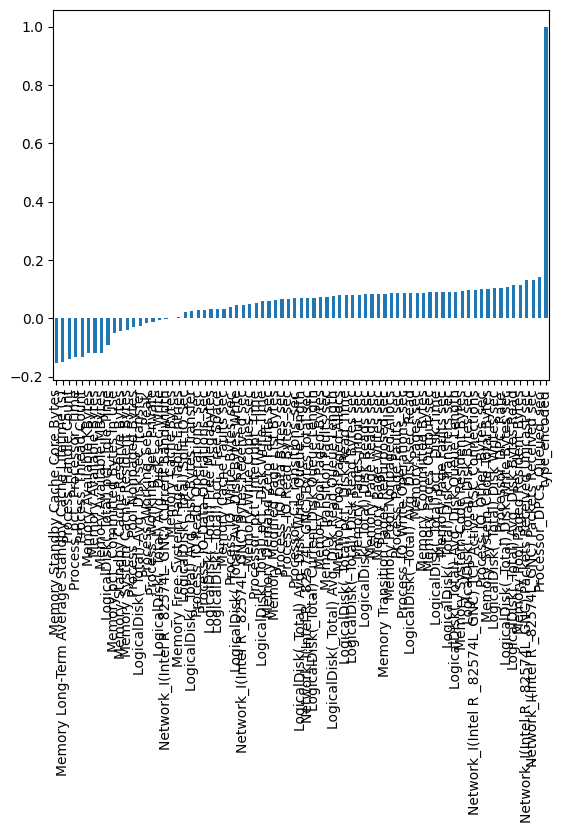

In [14]:
correlations = dataframe_selected.corr()['type_encoded']
correlations.sort_values().plot(kind="bar")


<Axes: xlabel='type_encoded', ylabel='count'>

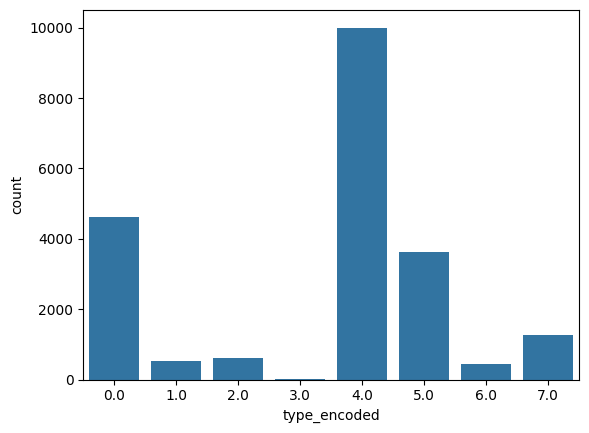

In [15]:
sns.countplot(x="type_encoded",data=dataframe_selected)

In [16]:
dataframe_selected = dataframe_selected.fillna(0)

In [17]:
X = dataframe_selected.drop(["type_encoded"], axis=1).values
y = dataframe_selected["type_encoded"].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.30)

print(f"traine ayrılan {len(X_train)}")
print(f"teste ayrılan {len(X_test)}")

traine ayrılan 14772
teste ayrılan 6332


In [19]:
X_train.shape

(14772, 76)

In [20]:
y_train.shape

(14772,)

In [21]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [23]:
# DecisionTreeClassifier Machine
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)
Tree_pred = Tree_model.predict(X_test)

In [24]:
"""# GradientBoostingClassifier
# GradientBoostingClassifier modelini oluşturma
Gradient_model = GradientBoostingClassifier(n_estimators=1000)

# Eğitim ve test setlerini tanımlama
Gradient_model.fit(X_train, y_train)

# Her bir tahminin performansını izlemek için staged_predict kullanma
best_iteration = None
best_accuracy = -1
for i, y_pred in enumerate(Gradient_model.staged_predict(X_test)):
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iteration = i

# En iyi iterasyonu kullanarak modeli tekrar eğitme
best_model = GradientBoostingClassifier(n_estimators=best_iteration)
best_model.fit(X_train, y_train)

# Tahmin yapma
Gradient_pred = best_model.predict(X_test)"""

'# GradientBoostingClassifier\n# GradientBoostingClassifier modelini oluşturma\nGradient_model = GradientBoostingClassifier(n_estimators=1000)\n\n# Eğitim ve test setlerini tanımlama\nGradient_model.fit(X_train, y_train)\n\n# Her bir tahminin performansını izlemek için staged_predict kullanma\nbest_iteration = None\nbest_accuracy = -1\nfor i, y_pred in enumerate(Gradient_model.staged_predict(X_test)):\n    accuracy = accuracy_score(y_test, y_pred)\n    if accuracy > best_accuracy:\n        best_accuracy = accuracy\n        best_iteration = i\n\n# En iyi iterasyonu kullanarak modeli tekrar eğitme\nbest_model = GradientBoostingClassifier(n_estimators=best_iteration)\nbest_model.fit(X_train, y_train)\n\n# Tahmin yapma\nGradient_pred = best_model.predict(X_test)'

In [25]:
KNe_model = KNeighborsClassifier()
KNe_model.fit(X_train, y_train)
KNe_pred = KNe_model.predict(X_test)

In [26]:
import joblib
# RandomForestClassifier

RandomF_model = RandomForestClassifier()
RandomF_model.fit(X_train, y_train)
RandomF_pred = RandomF_model.predict(X_test)

joblib.dump(RandomF_model, 'Iot_model_multi.pkl')


['Iot_model_multi.pkl']

In [27]:
import lightgbm as lgb

# LightGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(n_estimators=1000)  # 1000 ağaçlık bir model oluşturuyoruz, ancak erken durdurma ile eğitimi kontrol edeceğiz
eval_set = [(X_test, y_test)]  # Doğrulama seti (validation set) tanımlama
lgb_model.fit(X_train, y_train, eval_metric='logloss', eval_set=eval_set,
              callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# Eğitim sonucunda en iyi iterasyonu bulma
best_iteration = lgb_model.best_iteration_

# Tahmin yapma
lgb_pred = lgb_model.predict(X_test, num_iteration=best_iteration)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18230
[LightGBM] [Info] Number of data points in the train set: 14772, number of used features: 75
[LightGBM] [Info] Start training from score -1.519014
[LightGBM] [Info] Start training from score -3.697855
[LightGBM] [Info] Start training from score -3.534381
[LightGBM] [Info] Start training from score -7.202594
[LightGBM] [Info] Start training from score -0.753273
[LightGBM] [Info] Start training from score -1.747272
[LightGBM] [Info] Start training from score -3.867147
[LightGBM] [Info] Start training from score -2.807023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (Weighted): {precision_weighted}")
    print(f"Recall (Weighted): {recall_weighted}")
    print(f"F1 Score (Weighted): {f1_weighted}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")
    
    # Çok sınıflı ROC AUC hesaplama
    n_classes = len(np.unique(y_true))
    if n_classes > 2:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred == i)
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Ortalama ROC AUC hesaplama
        macro_roc_auc = np.mean(list(roc_auc.values()))
        print(f"ROC AUC (Macro): {macro_roc_auc}")
        
        # ROC eğrisini çizme
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        # İkili sınıflandırma için ROC AUC hesaplama
        roc_auc = roc_auc_score(y_true, y_pred)
        print(f"ROC AUC: {roc_auc}")


Logistic Regression Model:
Accuracy: 0.9162981680353759
Precision (Weighted): 0.9154514156974726
Recall (Weighted): 0.9162981680353759
F1 Score (Weighted): 0.9135297871087712
Confusion Matrix:
[[1241    0    0    0  117    0    0   16]
 [  14   46   89    0    1    3    0    6]
 [   0   16  163    0    2    0    0    0]
 [   0    0    0    0    1    3    0    0]
 [  89    4    0    0 2890   14    0   48]
 [  15    4    0    0   13 1021    0    1]
 [  16    3    0    0    0    0  119    0]
 [  20    0    0    0    1   34    0  322]]


ROC AUC (Macro): 0.8508845026559085


c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


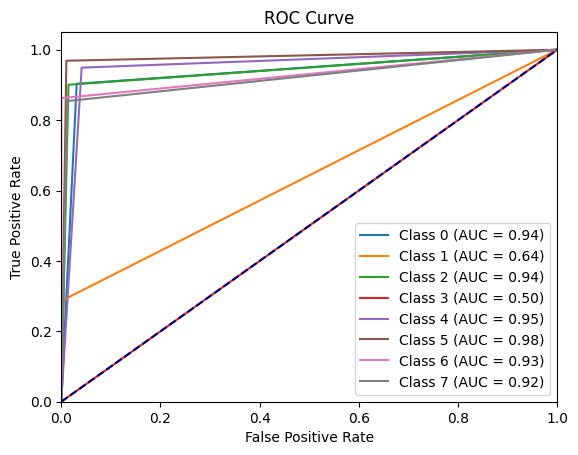

c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine Model:
Accuracy: 0.9559380922299432
Precision (Weighted): 0.9453252962841697
Recall (Weighted): 0.9559380922299432
F1 Score (Weighted): 0.946415921805087
Confusion Matrix:
[[1317    0    0    0   57    0    0    0]
 [  10    1  135    0    6    0    0    7]
 [   0    0  181    0    0    0    0    0]
 [   0    0    0    0    0    4    0    0]
 [   0    0    0    0 3042    3    0    0]
 [   8    1    0    0    1 1044    0    0]
 [  15    3    0    0    1    0  119    0]
 [   0    0    2    0    4   22    0  349]]


ROC AUC (Macro): 0.8553213449869633


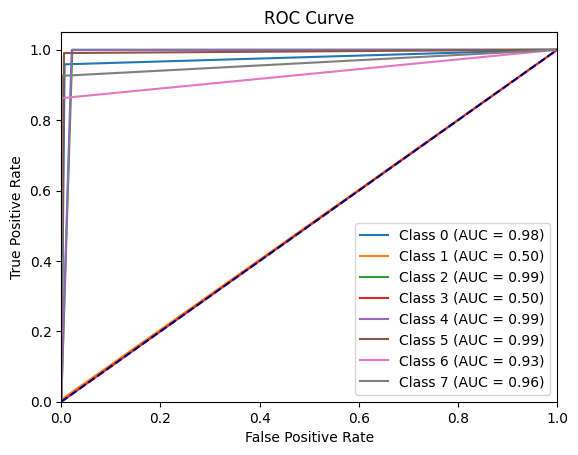

LightGBM Model:
Accuracy: 0.9974731522425774
Precision (Weighted): 0.9982286410875838
Recall (Weighted): 0.9974731522425774
F1 Score (Weighted): 0.9978062218342632
Confusion Matrix:
[[1374    0    0    0    0    0    0    0]
 [   0  156    1    1    1    0    0    0]
 [   0    0  179    2    0    0    0    0]
 [   0    0    0    2    0    2    0    0]
 [   0    0    0    1 3044    0    0    0]
 [   0    0    0    0    2 1052    0    0]
 [   0    0    0    3    0    0  135    0]
 [   0    2    0    1    0    0    0  374]]


ROC AUC (Macro): 0.9646948321339109


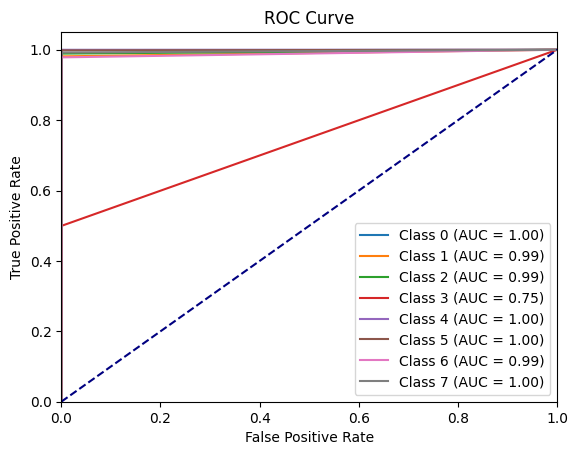

Karar Agacı Model:
Accuracy: 0.9993682880606444
Precision (Weighted): 0.9993674900588729
Recall (Weighted): 0.9993682880606444
F1 Score (Weighted): 0.999367304031032
Confusion Matrix:
[[1374    0    0    0    0    0    0    0]
 [   0  157    0    0    1    1    0    0]
 [   0    1  180    0    0    0    0    0]
 [   0    0    0    4    0    0    0    0]
 [   0    0    0    0 3045    0    0    0]
 [   0    0    0    0    0 1054    0    0]
 [   0    0    1    0    0    0  137    0]
 [   0    0    0    0    0    0    0  377]]


ROC AUC (Macro): 0.9983644924682418


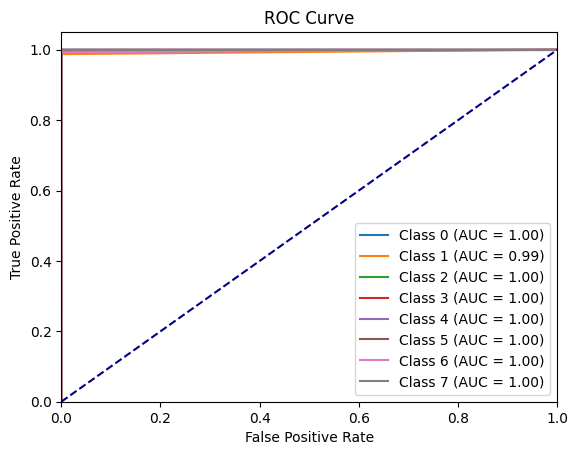

RandomForest Model:
Accuracy: 1.0
Precision (Weighted): 1.0
Recall (Weighted): 1.0
F1 Score (Weighted): 1.0
Confusion Matrix:
[[1374    0    0    0    0    0    0    0]
 [   0  159    0    0    0    0    0    0]
 [   0    0  181    0    0    0    0    0]
 [   0    0    0    4    0    0    0    0]
 [   0    0    0    0 3045    0    0    0]
 [   0    0    0    0    0 1054    0    0]
 [   0    0    0    0    0    0  138    0]
 [   0    0    0    0    0    0    0  377]]


ROC AUC (Macro): 1.0


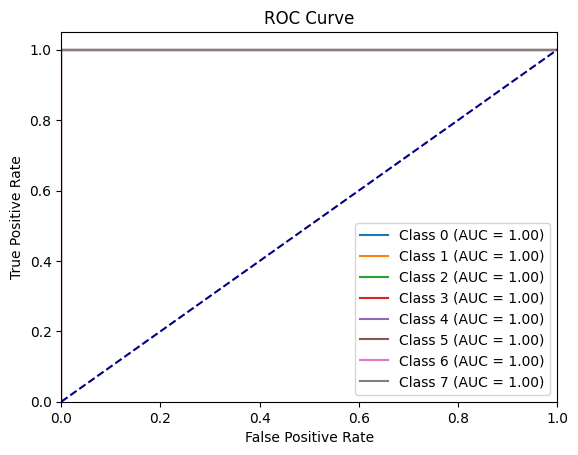

KNN Model:
Accuracy: 0.9974731522425774
Precision (Weighted): 0.9968471240128415
Recall (Weighted): 0.9974731522425774
F1 Score (Weighted): 0.9971404499908603
Confusion Matrix:
[[1374    0    0    0    0    0    0    0]
 [   2  150    1    0    2    0    1    3]
 [   0    0  181    0    0    0    0    0]
 [   0    0    0    0    0    4    0    0]
 [   0    0    0    0 3043    0    0    2]
 [   0    0    0    0    0 1054    0    0]
 [   0    1    0    0    0    0  137    0]
 [   0    0    0    0    0    0    0  377]]


ROC AUC (Macro): 0.9332748548875439


c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


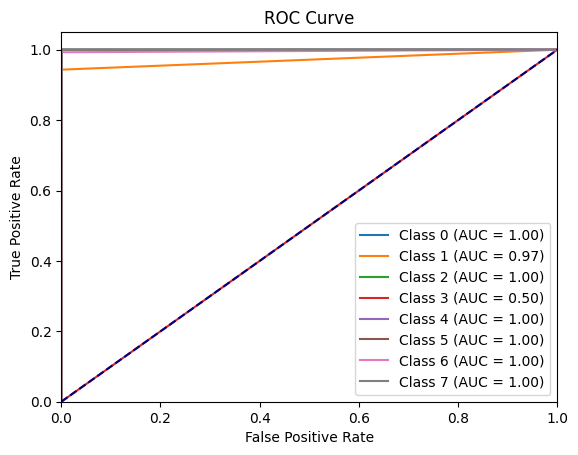

In [29]:
evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, lgb_pred, "LightGBM")
evaluate_model(y_test, Tree_pred, "Karar Agacı")
evaluate_model(y_test, RandomF_pred, "RandomForest")
evaluate_model(y_test, KNe_pred, "KNN")
#evaluate_model(y_test, Gradient_pred, "Gradient Boosting")

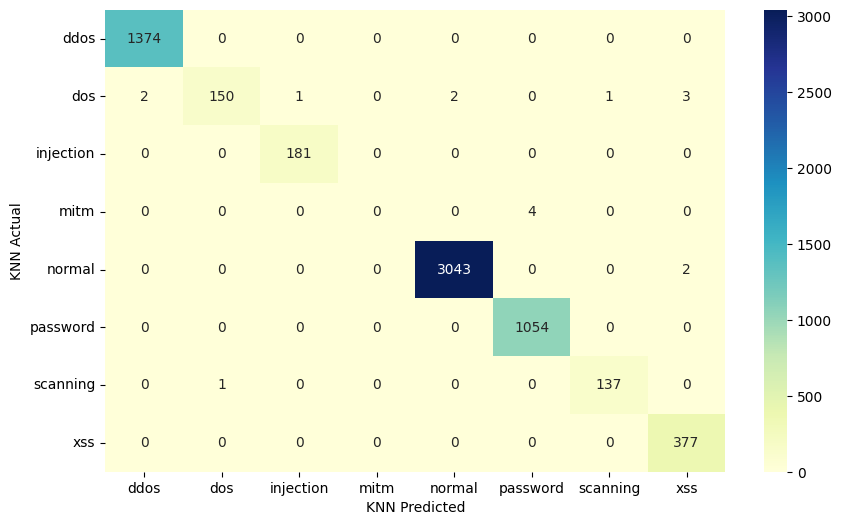

In [30]:
cm = confusion_matrix(y_test, KNe_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('KNN Predicted')
plt.ylabel('KNN Actual')
plt.show()

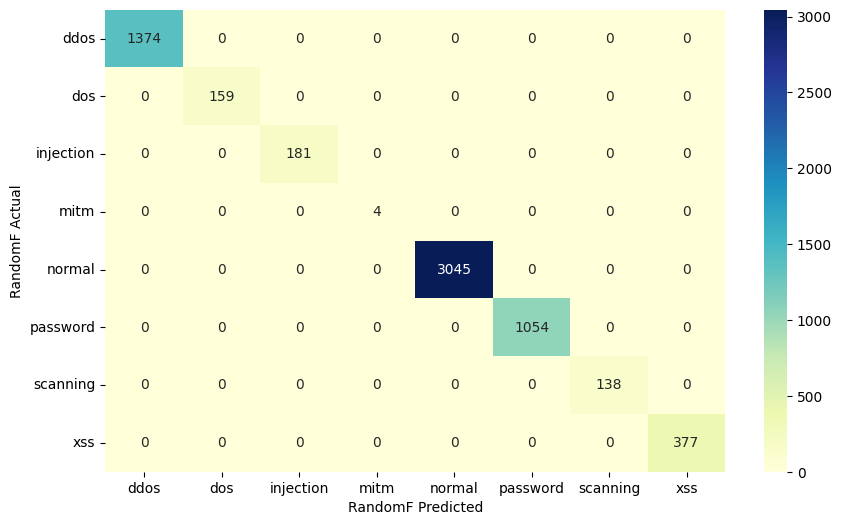

In [31]:
cm = confusion_matrix(y_test, RandomF_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('RandomF Predicted')
plt.ylabel('RandomF Actual')
plt.show()

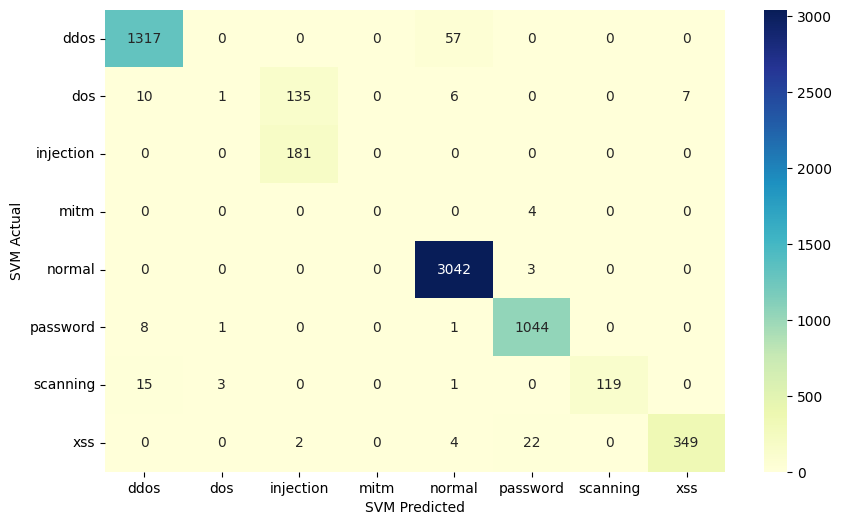

In [32]:
cm = confusion_matrix(y_test, svm_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('SVM Predicted')
plt.ylabel('SVM Actual')
plt.show()

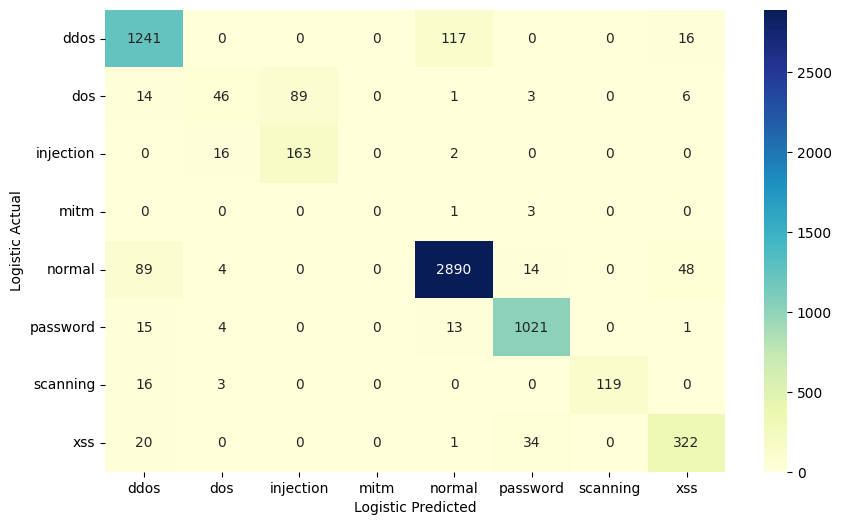

In [33]:
cm = confusion_matrix(y_test, logreg_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Logistic Predicted')
plt.ylabel('Logistic Actual')
plt.show()

In [35]:
"""cm = confusion_matrix(y_test, Gradient_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Gradient Predicted')
plt.ylabel('Gradient Actual')
plt.show()"""

'cm = confusion_matrix(y_test, Gradient_pred)\n\nclass_names = [\'ddos\', \'dos\' ,\'injection\' ,\'mitm\', \'normal\', \'password\', \'scanning\', \'xss\']\ncm_df = pd.DataFrame(cm, columns=class_names, index=class_names)\n\nplt.figure(figsize=(10, 6))\nsns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")\nplt.xlabel(\'Gradient Predicted\')\nplt.ylabel(\'Gradient Actual\')\nplt.show()'

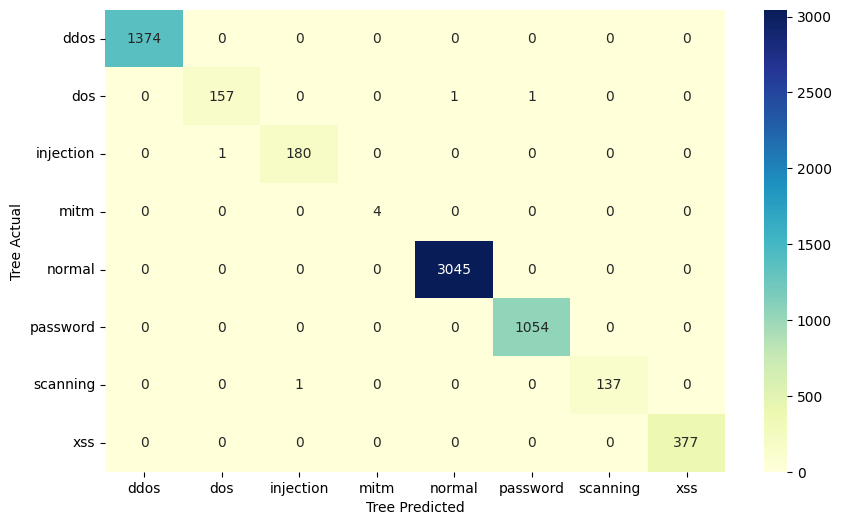

In [36]:
cm = confusion_matrix(y_test, Tree_pred)

class_names = ['ddos', 'dos' ,'injection' ,'mitm', 'normal', 'password', 'scanning', 'xss']
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Tree Predicted')
plt.ylabel('Tree Actual')
plt.show()